<a href="https://colab.research.google.com/github/egonloch/Desafio-Cientista-de-Dados/blob/main/Desafio_Lighthouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [652]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [615]:
df = pd.read_csv('/content/teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [617]:
print(df[['nome','host_name','ultima_review', 'reviews_por_mes']].isnull().sum())
porcentagem_sem_valor = df[['nome','host_name','ultima_review', 'reviews_por_mes']].isnull().mean() * 100
print(porcentagem_sem_valor)

nome                  16
host_name             21
ultima_review      10052
reviews_por_mes    10052
dtype: int64
nome                0.032724
host_name           0.042950
ultima_review      20.558760
reviews_por_mes    20.558760
dtype: float64


In [618]:
#deletar porque nomes nao sao relevantes se existe id
df = df.drop(columns=['nome', 'host_name'])

In [619]:
#deletar porque soma mais de 20% dos dados em branco
df = df.drop(columns=['ultima_review', 'reviews_por_mes'])

In [620]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [621]:
valores_zero = df[df['price'] == 0]
valores_zero['price'].count()

11

In [622]:
df_filtrado = df[df['price'] != 0]
df_filtrado['price'].describe()

,price
count,48883.000000
mean,152.755130
std,240.172716
min,10.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [623]:
print(df_filtrado['minimo_noites'].unique())

[   1    3   10   45    2    5    4   90    7   14   60   29   30  180
    9   31    6   15    8   26   28  200   50   17   21   11   25   13
   35   27   18   20   40   44   65   55  120  365  122   19  240   88
  115  150  370   16   80  181  265  300   59  185  360   56   12   70
   39   24   32 1000  110  270   22   75  250   62   23 1250  364   74
  198  100  500   43   91  480   53   99  160   47  999  186  366   68
   93   87  183  299  175   98  133  354   42   33   37  225  400  105
  184  153  134  222   58  210  275  182  114   85   36]


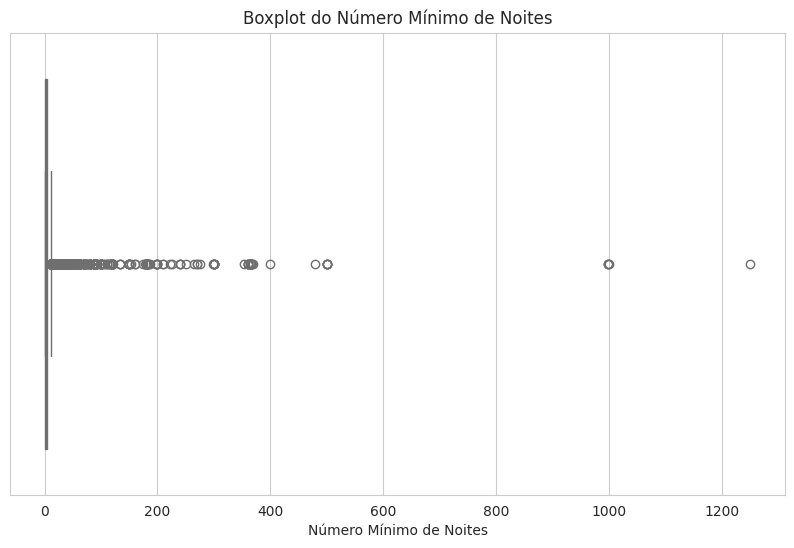

In [624]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['minimo_noites'], color='skyblue')
plt.title("Boxplot do Número Mínimo de Noites")
plt.xlabel("Número Mínimo de Noites")
plt.show()

In [625]:
print(np.where(df_filtrado['minimo_noites']>600))

(array([ 2853,  5766, 13403, 26331, 38652]),)


In [626]:
linhas_especificas = df_filtrado.iloc[[2853,  5766, 13403, 26331, 38652]]

display(linhas_especificas['minimo_noites'])

,minimo_noites
2853,1000
5766,1250
13403,999
26340,999
38663,999


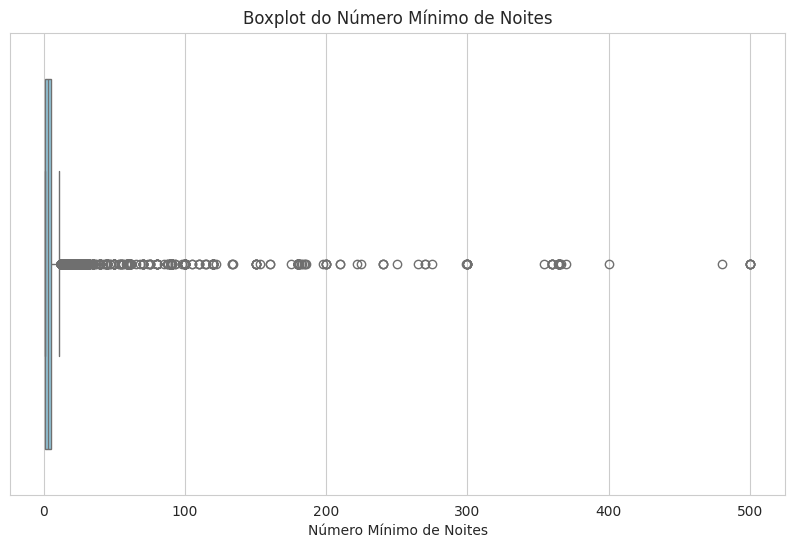

In [627]:
df_filtrado = df_filtrado[df_filtrado['minimo_noites'] <= 600]

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtrado['minimo_noites'], color='skyblue')
plt.title("Boxplot do Número Mínimo de Noites")
plt.xlabel("Número Mínimo de Noites")
plt.show()

In [628]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48878 entries, 0 to 48893
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48878 non-null  int64  
 1   host_id                        48878 non-null  int64  
 2   bairro_group                   48878 non-null  object 
 3   bairro                         48878 non-null  object 
 4   latitude                       48878 non-null  float64
 5   longitude                      48878 non-null  float64
 6   room_type                      48878 non-null  object 
 7   price                          48878 non-null  int64  
 8   minimo_noites                  48878 non-null  int64  
 9   numero_de_reviews              48878 non-null  int64  
 10  calculado_host_listings_count  48878 non-null  int64  
 11  disponibilidade_365            48878 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 4.

In [629]:
num_categorias_bairro = df_filtrado['bairro'].nunique()
print(f"Número de categorias únicas em 'bairro': {num_categorias_bairro}")

Número de categorias únicas em 'bairro': 221


In [630]:
# Calculando os quartis
q1 = df_filtrado['price'].quantile(0.25)
q3 = df_filtrado['price'].quantile(0.75)

# Definindo os preços como baratos, médios e caros
def categorizar_preco(preco):
    if preco < q1:
        return 'Barato'
    elif q1 <= preco <= q3:
        return 'Médio'
    else:
        return 'Caro'

# Aplicando a categorização
df_filtrado['categoria_preco'] = df_filtrado['price'].apply(categorizar_preco)

# Verificando a distribuição
print(df_filtrado['categoria_preco'].value_counts())

categoria_preco
Médio     24715
Caro      12175
Barato    11988
Name: count, dtype: int64


In [631]:
# Passo 1: Criar uma tabela com a contagem de categorias de preço por bairro
bairro_categorias = df_filtrado.groupby(['bairro', 'categoria_preco']).size().unstack(fill_value=0)

# Passo 2: Encontrar a categoria de preço predominante em cada bairro
bairro_categorias['categoria_bairro'] = bairro_categorias.idxmax(axis=1)

# Passo 3: Adicionar a nova categoria ao DataFrame original
df_filtrado = df_filtrado.merge(bairro_categorias['categoria_bairro'], on='bairro', how='left')

# Exibir as primeiras linhas
print(df_filtrado[['bairro','categoria_bairro']].head(10))

               bairro categoria_bairro
0             Midtown             Caro
1              Harlem            Médio
2        Clinton Hill            Médio
3         East Harlem            Médio
4         Murray Hill             Caro
5  Bedford-Stuyvesant            Médio
6      Hell's Kitchen            Médio
7     Upper West Side            Médio
8           Chinatown            Médio
9     Upper West Side            Médio


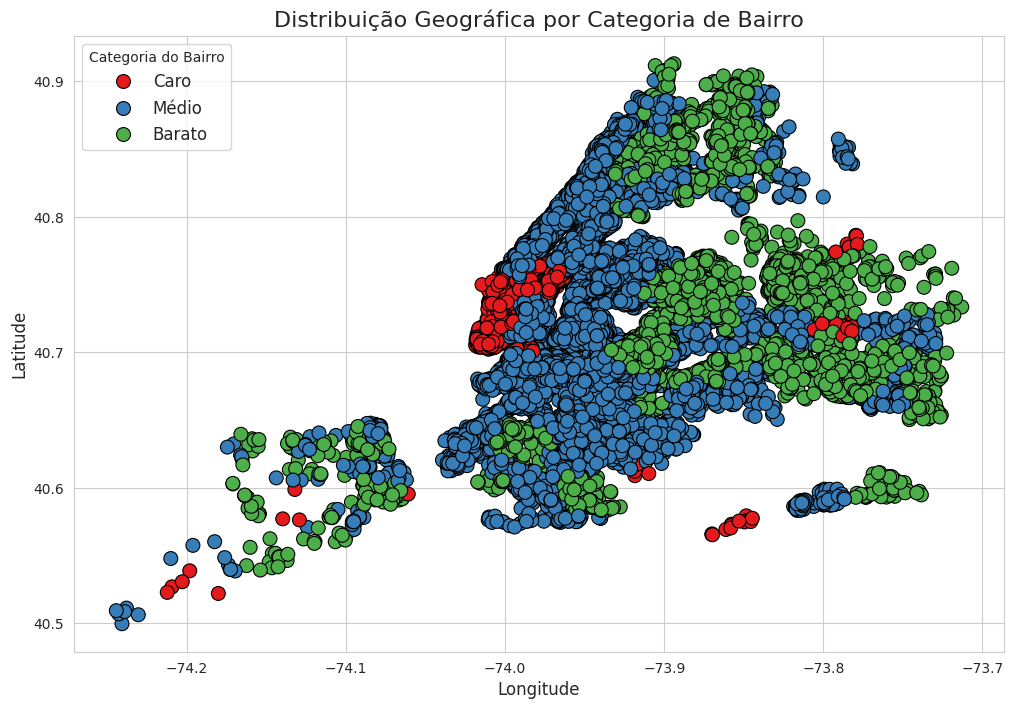

In [632]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 8))

# Criando o gráfico de dispersão
sns.scatterplot(x='longitude', y='latitude', hue='categoria_bairro', data=df_filtrado, palette='Set1', s=100, edgecolor='black')

# Ajustando título e rótulos
plt.title('Distribuição Geográfica por Categoria de Bairro', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Exibindo a legenda
plt.legend(title='Categoria do Bairro', fontsize=12)

# Mostrando o gráfico
plt.show()

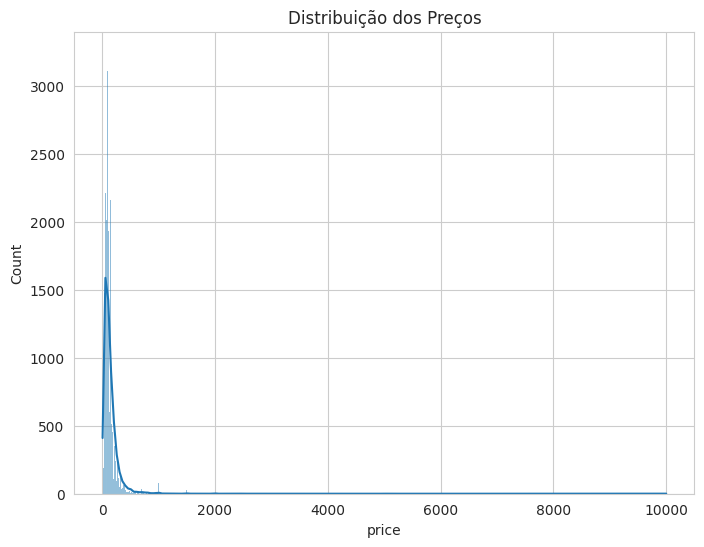

In [633]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['price'], kde=True)
plt.title('Distribuição dos Preços')
plt.show()

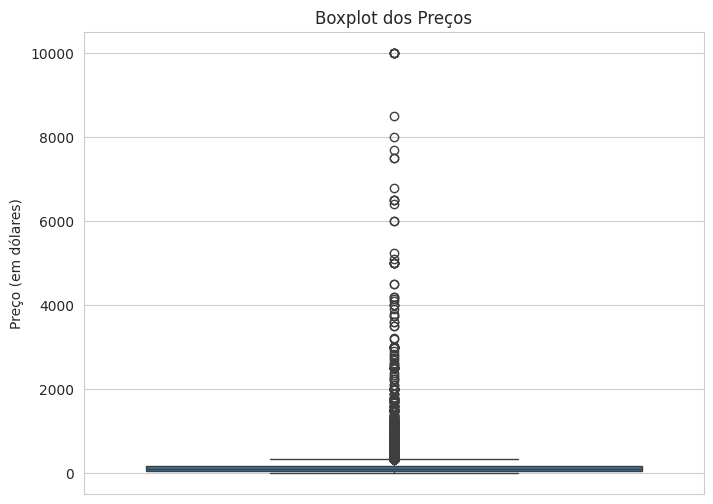

In [634]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtrado['price'])
plt.title('Boxplot dos Preços')
plt.ylabel("Preço (em dólares)")
plt.show()

In [635]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48878 entries, 0 to 48877
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48878 non-null  int64  
 1   host_id                        48878 non-null  int64  
 2   bairro_group                   48878 non-null  object 
 3   bairro                         48878 non-null  object 
 4   latitude                       48878 non-null  float64
 5   longitude                      48878 non-null  float64
 6   room_type                      48878 non-null  object 
 7   price                          48878 non-null  int64  
 8   minimo_noites                  48878 non-null  int64  
 9   numero_de_reviews              48878 non-null  int64  
 10  calculado_host_listings_count  48878 non-null  int64  
 11  disponibilidade_365            48878 non-null  int64  
 12  categoria_preco                48878 non-null 

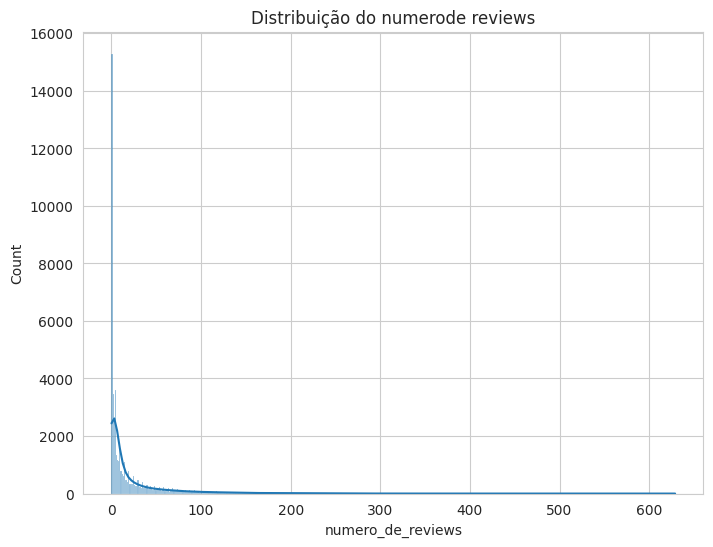

In [636]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtrado['numero_de_reviews'], kde=True)
plt.title('Distribuição do numerode reviews')
plt.show()

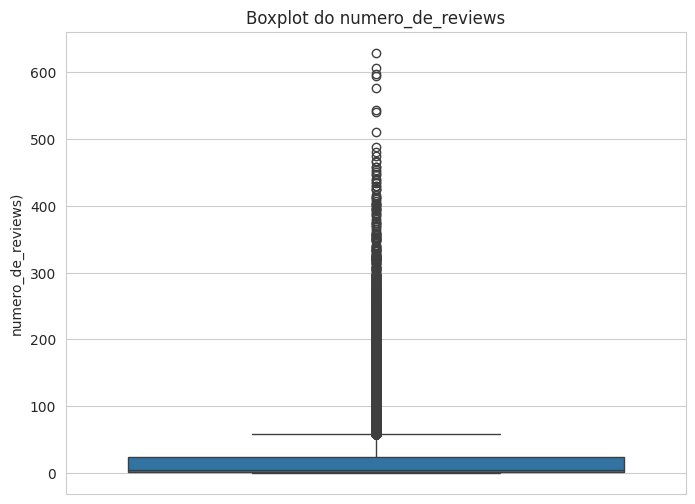

In [637]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtrado['numero_de_reviews'])
plt.title('Boxplot do numero_de_reviews')
plt.ylabel("numero_de_reviews)")
plt.show()

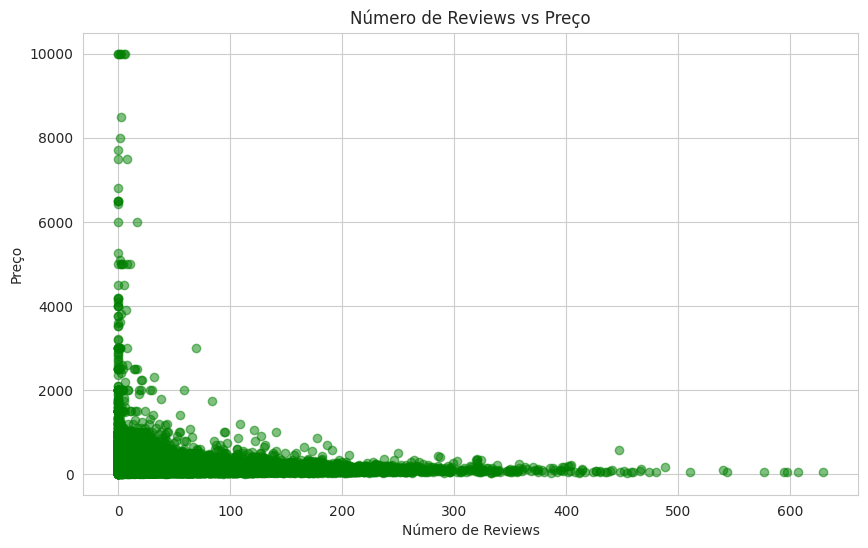

In [638]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['numero_de_reviews'], df_filtrado['price'], alpha=0.5, color='green')
plt.title("Número de Reviews vs Preço")
plt.xlabel("Número de Reviews")
plt.ylabel("Preço")
plt.show()

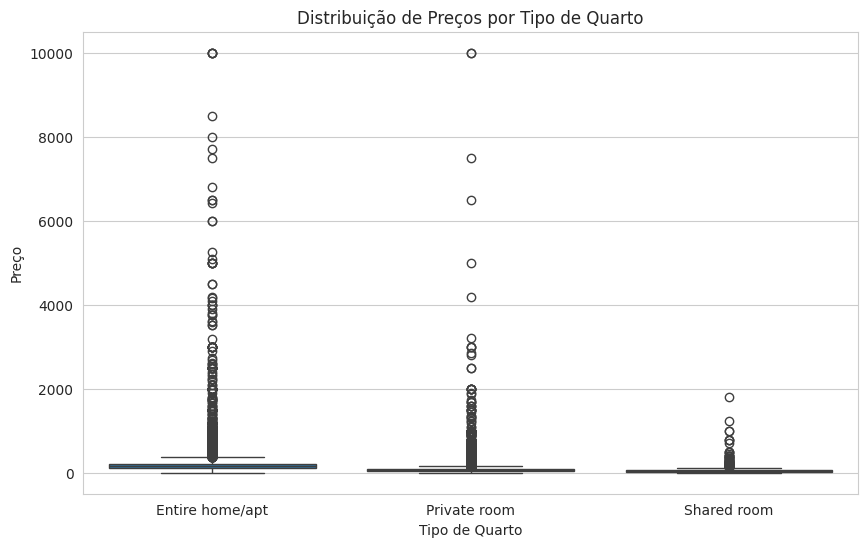

In [639]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df_filtrado)
plt.title("Distribuição de Preços por Tipo de Quarto")
plt.xlabel("Tipo de Quarto")
plt.ylabel("Preço")
plt.show()

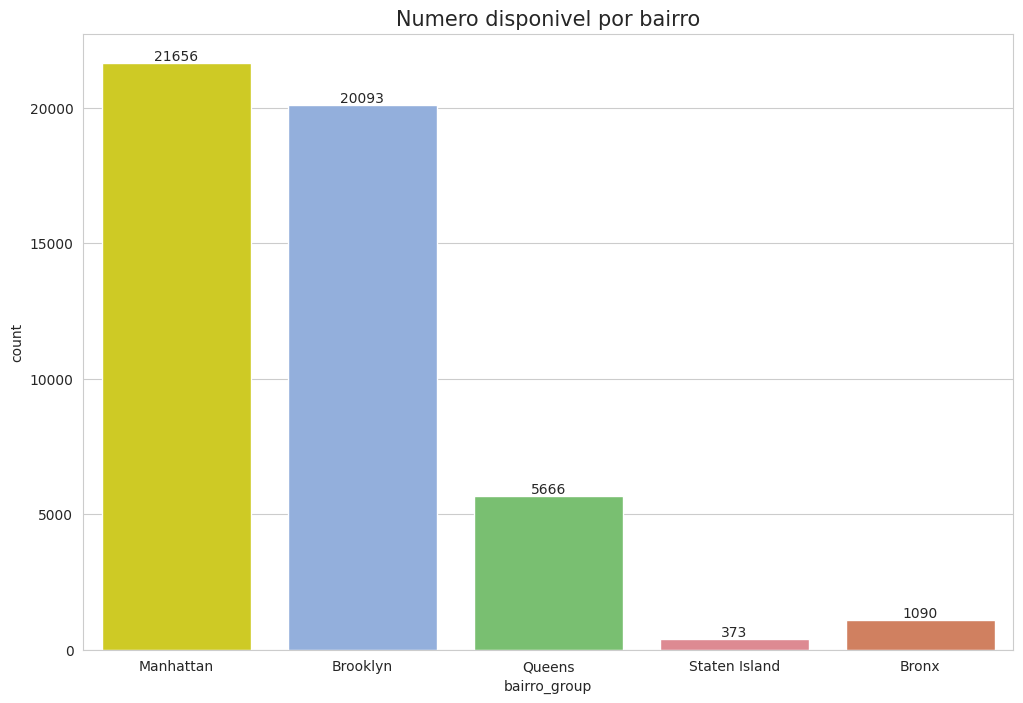

In [640]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(figsize=(12,8))
colors = ['#87ace8','#e3784d', '#6ecc64','#b644e3','#eb7c87', '#EAE509']

ax = sns.countplot(x='bairro_group',data=df_filtrado, palette=['#EAE509','#87ace8', '#6ecc64','#eb7c87','#e3784d','#b644e3'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Numero disponivel por bairro',fontsize=15)
plt.show()

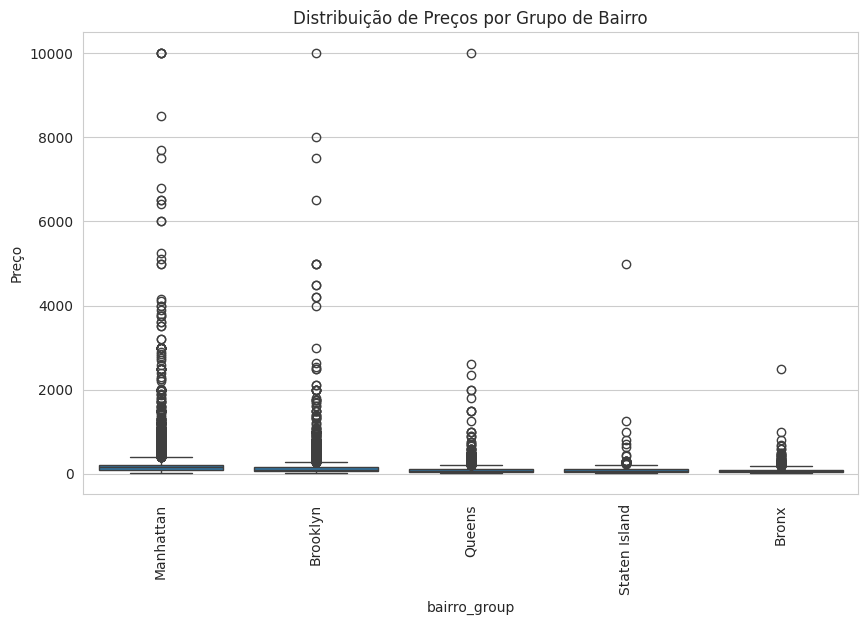

In [641]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bairro_group', y='price', data=df_filtrado)
plt.title("Distribuição de Preços por Grupo de Bairro")
plt.xlabel("bairro_group")
plt.ylabel("Preço")
plt.xticks(rotation=90)  # Para rotacionar os nomes dos bairros se necessário
plt.show()

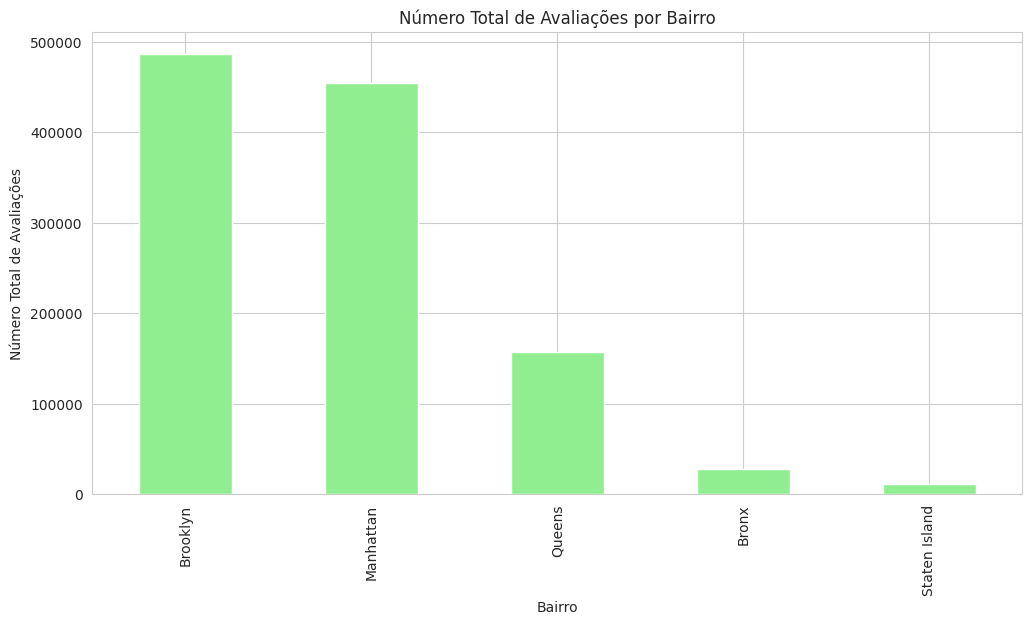

In [642]:
# Calcular o número total de avaliações por bairro
avaliacoes_bairro = df_filtrado.groupby('bairro_group')['numero_de_reviews'].sum().sort_values(ascending=False)

# Visualizar o gráfico
plt.figure(figsize=(12, 6))
avaliacoes_bairro.plot(kind='bar', color='lightgreen')
plt.title("Número Total de Avaliações por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Número Total de Avaliações")
plt.xticks(rotation=90)
plt.show()

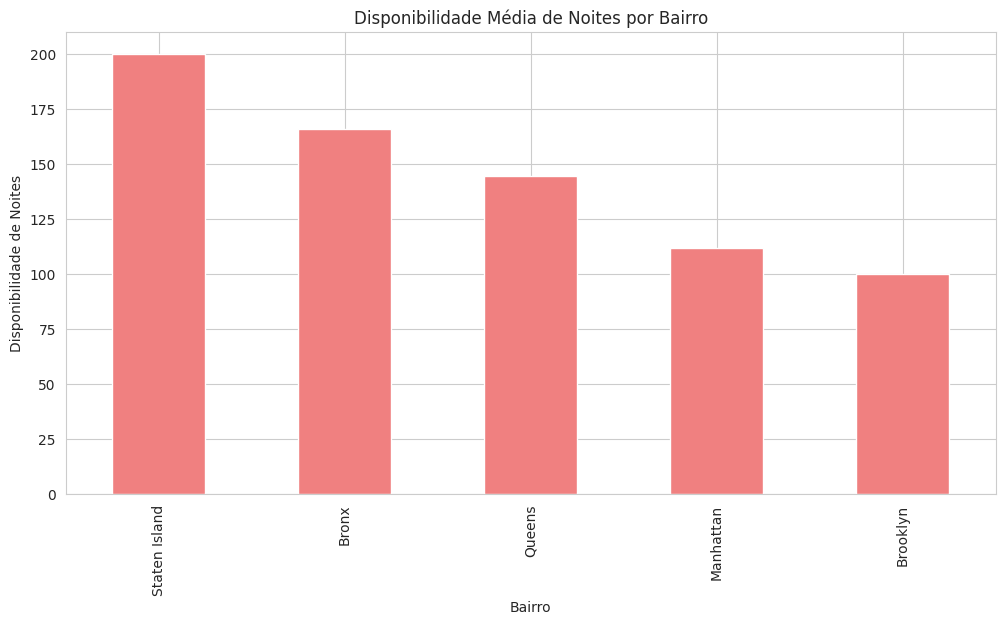

In [643]:
# Calcular a disponibilidade média de noites por bairro
disponibilidade_bairro = df_filtrado.groupby('bairro_group')['disponibilidade_365'].mean().sort_values(ascending=False)

# Visualizar o gráfico
plt.figure(figsize=(12, 6))
disponibilidade_bairro.plot(kind='bar', color='lightcoral')
plt.title("Disponibilidade Média de Noites por Bairro")
plt.xlabel("Bairro")
plt.ylabel("Disponibilidade de Noites")
plt.xticks(rotation=90)
plt.show()

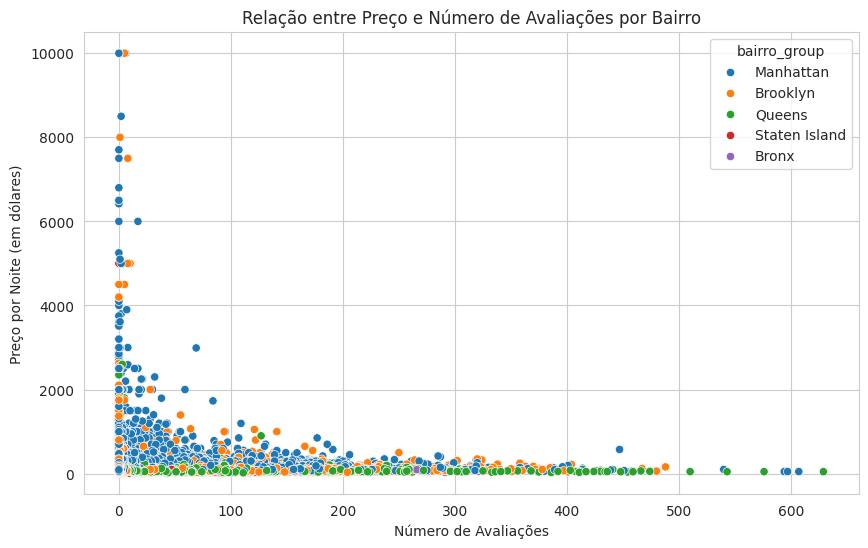

In [644]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numero_de_reviews', y='price', data=df_filtrado, hue='bairro_group', palette='tab10')
plt.title("Relação entre Preço e Número de Avaliações por Bairro")
plt.xlabel("Número de Avaliações")
plt.ylabel("Preço por Noite (em dólares)")
plt.show()

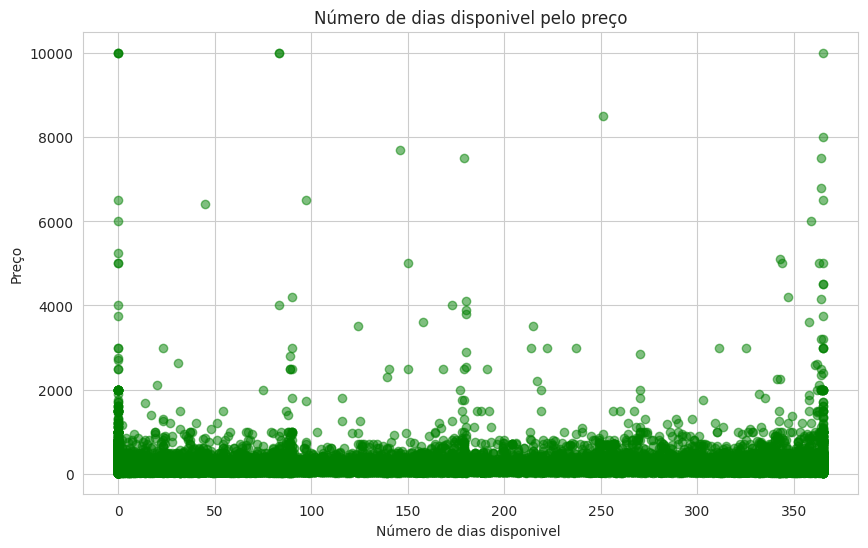

In [645]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['disponibilidade_365'], df_filtrado['price'], alpha=0.5, color='green')
plt.title("Número de dias disponivel pelo preço")
plt.xlabel("Número de dias disponivel ")
plt.ylabel("Preço")
plt.show()

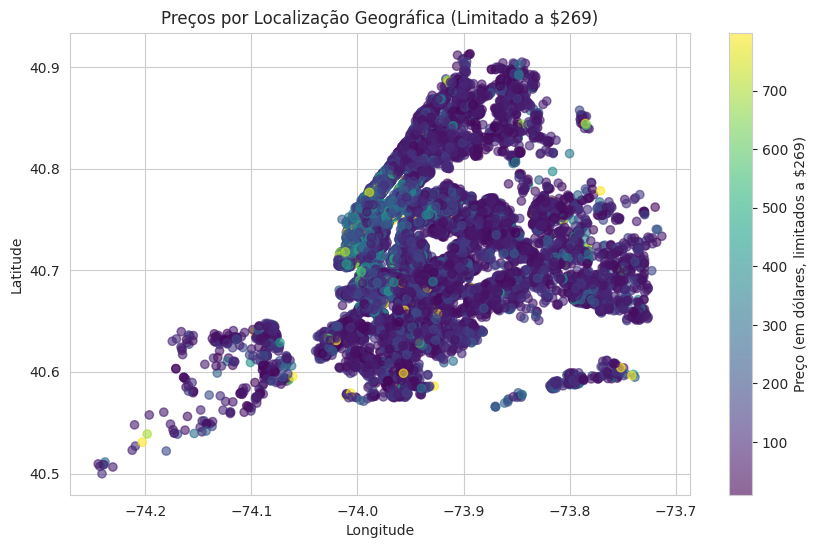

In [646]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Definir limite superior para os preços
max_price = 799.00

# Normalizar os preços para o colormap
norm = mcolors.Normalize(vmin=df_filtrado['price'].min(), vmax=max_price)

# Criar o scatterplot com cores baseadas no preço (valores acima de max_price terão a mesma cor)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_filtrado['longitude'],
    df_filtrado['latitude'],
    c=df_filtrado['price'].clip(upper=max_price),  # Limita o preço ao máximo de 2000
    cmap='viridis',
    alpha=0.6
)

# Adicionar título e rótulos
plt.title("Preços por Localização Geográfica (Limitado a $269)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Adicionar a barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label("Preço (em dólares, limitados a $269)")

plt.show()

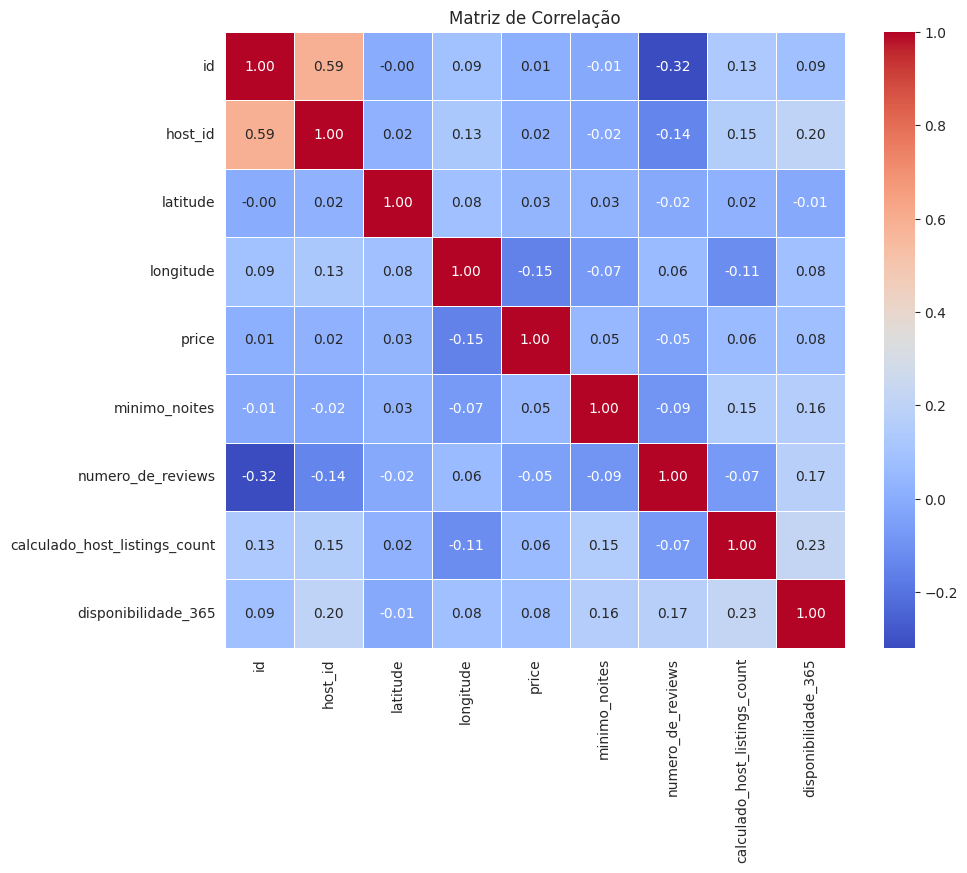

In [647]:
# Selecionar apenas as colunas numéricas
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação entre as colunas numéricas
correlacao = df_numerico.corr()


# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

Modelagem

In [667]:
X = df_filtrado.drop(columns=['price', 'id', 'host_id', 'categoria_preco'], errors='ignore')
colunas_numericas = X.select_dtypes(include=['float64', 'int64']).columns
colunas_categoricas = X.select_dtypes(include=['object']).columns

print("Colunas Numéricas:", colunas_numericas)
print("Colunas Categóricas:", colunas_categoricas)

Colunas Numéricas: Index(['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')
Colunas Categóricas: Index(['bairro_group', 'bairro', 'room_type', 'categoria_bairro'], dtype='object')


In [668]:
# Criando o codificador OneHot para as colunas categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Criando o pré-processador para as colunas categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', encoder, colunas_categoricas),  # Categóricas
        ('scaler', StandardScaler(), colunas_numericas)  # Numéricas
    ])

# Aplicando o pré-processador nas colunas
X_encoded = preprocessor.fit_transform(X)

# Verificando o resultado do pré-processamento
print(X_encoded[:5])

[[ 0.          1.          0.         ...  0.48764074 -0.15611401
   1.84057289]
 [ 0.          1.          0.         ... -0.52238986 -0.18645582
   1.91655351]
 [ 1.          0.          0.         ...  5.53779372 -0.18645582
   0.61728493]
 [ 0.          1.          0.         ... -0.32038374 -0.18645582
  -0.85673907]
 [ 0.          1.          0.         ...  1.13854935 -0.18645582
   0.12341091]]


In [669]:
# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, df_filtrado['price'], test_size=0.2, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (39102, 234)
Tamanho do conjunto de teste: (9776, 234)


In [670]:
# Criar o modelo de regressão linear
lm = LinearRegression()

# Treinar o modelo
lm.fit(X_train, y_train)

# Fazer as previsões no conjunto de teste
y_pred = lm.predict(X_test)


# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de avaliação
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

MAE: 68.40534404407579
MSE: 37243.70121655196
R2: 0.13584077816516504


In [607]:
dados_item4 = {
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355]
}